<ipython-input-13-1080033b354b>:16: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 98 rows containing non-finite values.


          percentage_male  base_happiness      type
type1                                              
bug             49.825000       67.083333       bug
dark            50.550000       42.241379      dark
dragon          50.000000       42.962963    dragon
electric        55.665517       68.461538  electric
fairy           41.176471       77.777778     fairy
fighting        70.692857       70.000000  fighting
fire            68.491667       68.461538      fire
flying          66.666667       76.666667    flying
ghost           50.000000       58.333333     ghost
grass           58.978378       67.692308     grass
ground          51.851852       68.437500    ground
ice             44.405000       65.434783       ice
normal          47.503125       69.571429    normal
poison          49.628125       70.937500    poison
psychic         51.058333       63.584906   psychic
rock            69.564865       64.555556      rock
steel           50.000000       50.833333     steel
water       

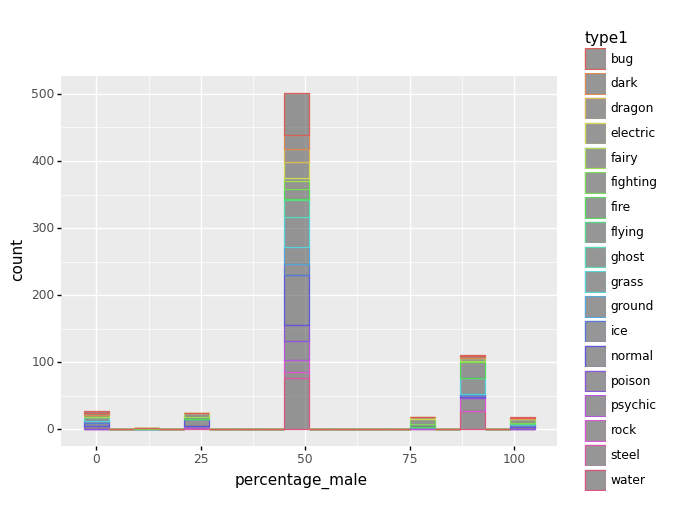

<ggplot: (8732206507581)>


/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gender_hist.png
/usr/local/lib/python3.8/dist-packages/plotnine/layer.py:372: PlotnineWarning: stat_bin : Removed 98 rows containing non-finite values.


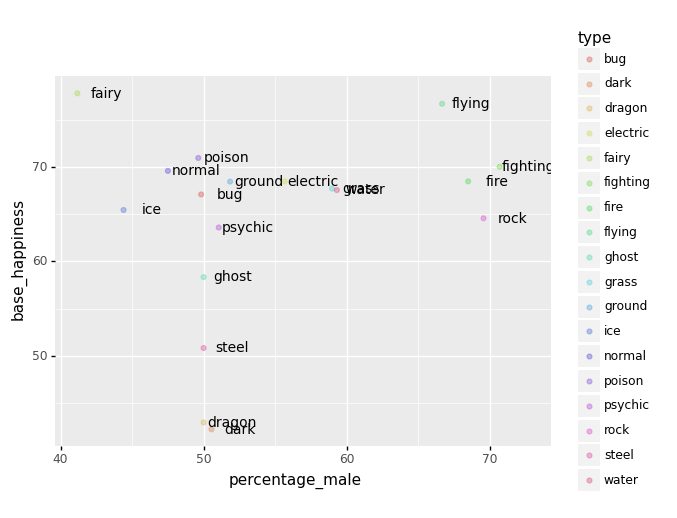

<ggplot: (8732200256690)>


/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:727: PlotnineWarning: Saving 5 x 5 in image.
/usr/local/lib/python3.8/dist-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: figures/gender_happinessbytype.png


In [13]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt
import plotnine as p9
from plotnine import ggplot, geom_point, aes, stat_smooth, facet_wrap, geom_text, geom_histogram;
pt = pd.read_csv('derived_data/pokemon_tidy.csv')
df = pd.DataFrame(pt)
df['percentage_male'].astype(str).str.replace("NA", "99")

conditions = [
    (df['percentage_male'] > .5) & (df['percentage_male'] < 98) , 
    (df['percentage_male'] < .5),
    (df['percentage_male'] == .5)
]
values = ['male', 'female', 'neither']
avg = df.groupby(by="type1")['type1','percentage_male','base_happiness'].mean()
avg["type"] = avg.index;
print(avg)
happy = (ggplot(aes(x='percentage_male'), data=df)+geom_histogram(aes(color = 'type1'), binwidth=6, alpha=0.6, data=df))
print(happy)
happy.save(filename = 'figures/gender_hist.png', height=5, width=5, units = 'in', dpi=1000)
happyt = (ggplot(aes(x='percentage_male', y='base_happiness'), data=avg)+geom_point(aes(color = 'type'), alpha=0.4, data=avg)) + geom_text(aes(label='type'), nudge_x = 2 ,size=10)
print(happyt)
happyt.save(filename = 'figures/gender_happinessbytype.png', height=5, width=5, units = 'in', dpi=1000)